In [86]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
%matplotlib inline

In [143]:

data = pd.read_csv("CrimeData.csv")
data

pd.set_option('display.max_rows', None) # allows me to see all the rows of the data set

data[['neighborhood','neighborhood_crime_rate_1975']] # showing just most recent crime rate

,neighborhood,neighborhood_crime_rate_1975
0,Westwood,0.023
1,31st ward,0.013
2,Arlington,0.028
3,Allegheny Center,0.312
4,Allegheny West,0.217
5,Allentown,0.025
6,Banksville-Greentree,0.021
7,Beechview,0.020
8,Beltzhoover,0.045
9,Bloomfield,0.052


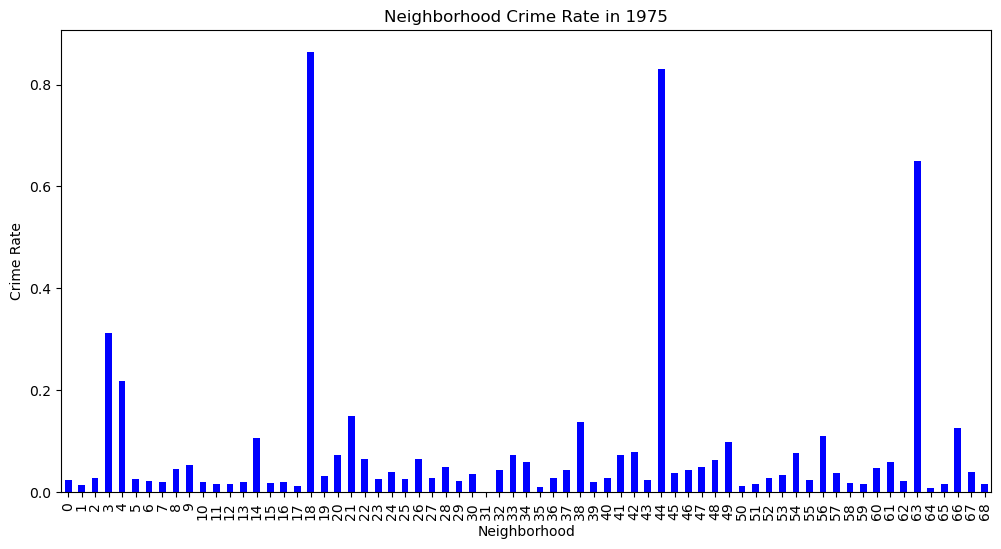

In [24]:
# Creating a bar graph to determine the neighborhood hood with most amount of crime easily
plt.figure(figsize=(12, 6))  # allows the graph to fit nicely 
data['neighborhood_crime_rate_1975'].plot(kind='bar', color='blue')

# labeling the axis and creating a title
plt.title('Neighborhood Crime Rate in 1975')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')

plt.show()

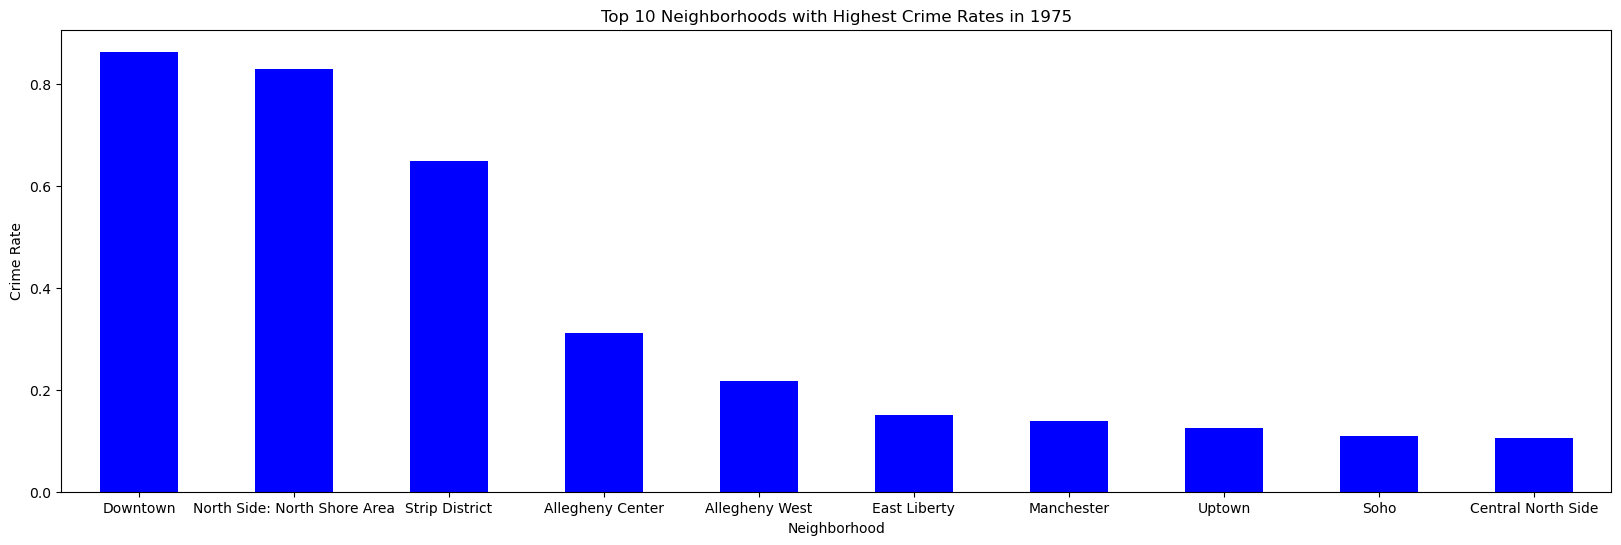

In [25]:
# now a top 10 most crimes
top_10_crime_data = data[['neighborhood', 'neighborhood_crime_rate_1975']].sort_values(by='neighborhood_crime_rate_1975', ascending=False).head(10)
plt.figure(figsize=(20, 6))  # Set the figure size
top_10_crime_data.set_index('neighborhood')['neighborhood_crime_rate_1975'].plot(kind='bar', color='blue', rot = 0)


plt.title('Top 10 Neighborhoods with Highest Crime Rates in 1975')
plt.xlabel('Neighborhood')
plt.ylabel('Crime Rate')

plt.show()

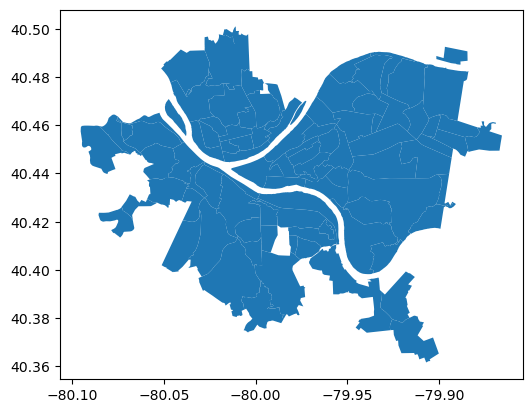

In [126]:
# now adding the map of all the neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe
plt.show()

<Axes: >

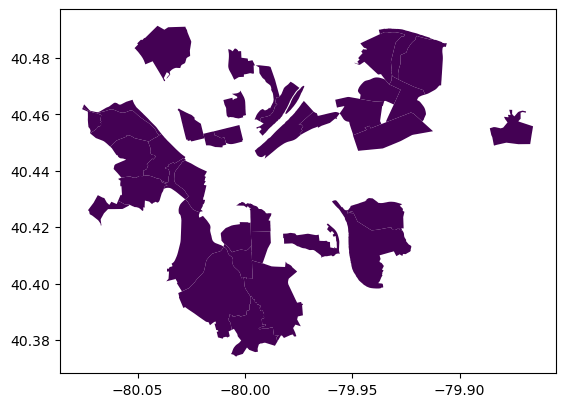

In [158]:
pd.set_option('display.max_rows', None)
# do the merge
school_count = data.groupby('neighborhood')['neighborhood_crime_rate_1975'].sum().reset_index()
crime_map = neighborhoods.merge(crime_count, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
crime_map[['hood','neighborhood_crime_rate_1975','geometry']]

crime_map.plot(column='neighborhood_crime_rate_1975')

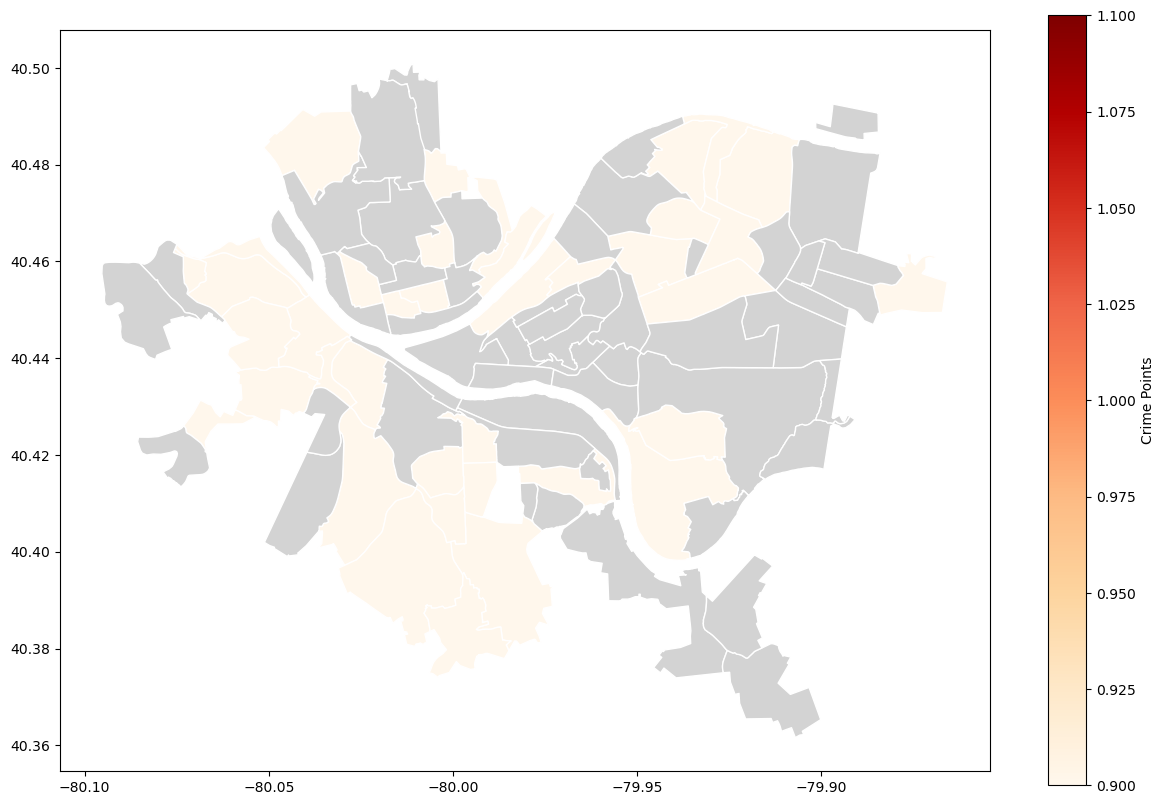

In [98]:
crime_map.plot(column='neighborhood_crime_rate_1975', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Crime Points"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )
plt.show()

In [146]:
print(data['neighborhood'].unique())

# Unique hood names from Neighborhoods shapefile
print(neighborhoods['hood'].unique())

['Westwood' '31st ward' 'Arlington' 'Allegheny Center' 'Allegheny West'
 'Allentown' 'Banksville-Greentree' 'Beechview' 'Beltzhoover' 'Bloomfield'
 'Bon Air' 'Brighton Heights' 'Brookline' 'Carrick' 'Central North Side'
 'Chartiers City' 'City View' 'Crafton Heights' 'Downtown'
 'Duquesne Heights' 'East Hills' 'East Liberty'
 'East Liberty: Larimer Area' 'East Liberty: Lincoln-Lemington'
 'East Street Valley' 'Elliott' 'Esplen' 'Fineview' 'Garfield'
 'Greenfield' 'Hazelwood' 'Glen Hazel Heights' 'Highland Park' 'Hill'
 'Homewood - Brushton' 'Ivory Avenue District' 'Knoxville' 'Lawrenceville'
 'Manchester' 'Morningside' 'Mt. Washington'
 'North Side: California-Kirkbride Area' 'North Side:East North Side Area'
 'North Side: Marshall-Shadeland Area ' 'North Side: North Shore Area'
 'North Side: Perry Hilltop-Perrysville Avenue Area'
 'North Side: Pleasant Valley Area' 'North Side: Summer Hill Area'
 'Northview Heights' 'Oakland' 'Oakwood' 'Overbrook' 'Polish Hill'
 'Regent Square and Fri